# Машинное обучение, РЭШ

# Практическое задание 7. Бустинговое

## Общая информация

Дата выдачи: 10.12.2022

Дедлайн: 25.12.2022 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему mynes. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb
* Файл [boosting.py](https://github.com/esokolov/ml-course-hse/tree/master/2021-fall/homeworks-practice/homework-practice-07-boosting)

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [68]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='darkgrid')
filterwarnings('ignore')

[Ссылка на данные](https://github.com/esokolov/ml-course-hse/tree/master/2021-fall/homeworks-practice/homework-practice-07-boosting)

In [69]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [71]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [73]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 566 ms, sys: 9.46 ms, total: 576 ms
Wall time: 575 ms
Train ROC-AUC 0.9912
Valid ROC-AUC 0.9134
Test ROC-AUC 0.9140


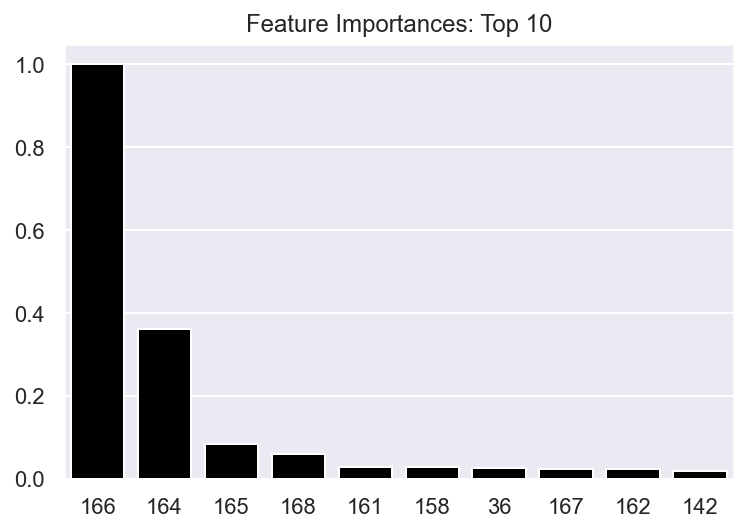

In [77]:
def plot_feature_importances(model, top):
    importances = model.feature_importances_
    descending = np.argsort(-importances)[:top]
    importances = importances[descending]
    fig = sns.barplot(x=descending, y=importances, 
                      order = descending,
                      color='black')
    fig.set(title = f'Feature Importances: Top {top}')
    pass

plot_feature_importances(boosting, top=10)

## Задание 2. Обучение градиентного бустинга (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

In [78]:
from tqdm import tqdm, trange
import pandas as pd
from collections import defaultdict

In [79]:
depths = range(1, 30, 2)
results = defaultdict(list)

for depth in tqdm(depths):
    boost = Boosting(base_model_params={'max_depth': depth},
                     subsample=0.3)
    boost.fit(x_train, y_train, x_valid, y_valid)
    results['train'].append(boost.score(x_train, y_train))
    results['test'].append(boost.score(x_test, y_test))

100%|██████████| 15/15 [00:09<00:00,  1.62it/s]


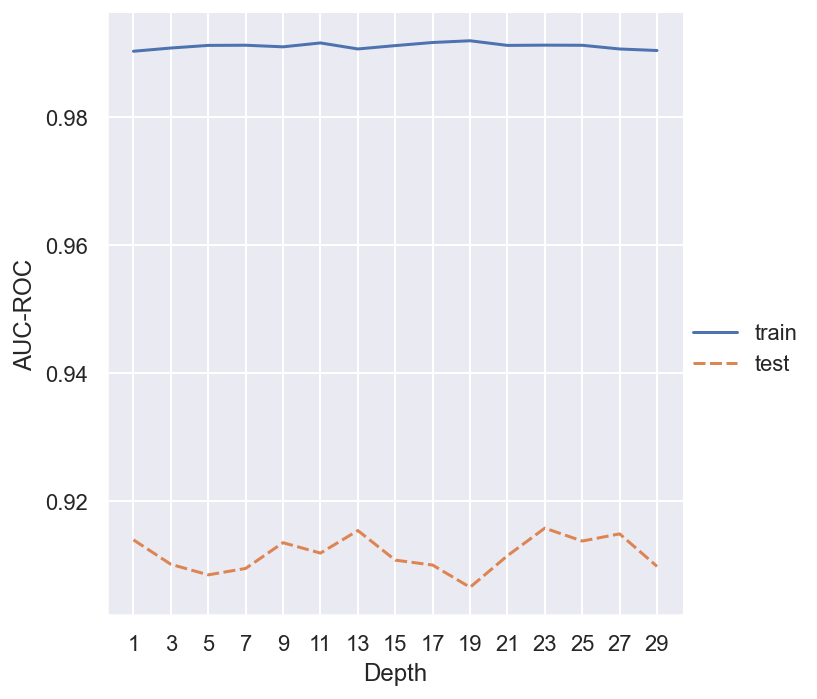

In [80]:
fig = sns.relplot(data=results, kind='line')
fig.set_ylabels('AUC-ROC')
fig.set_xlabels('Depth')
fig.ax.set_xticks(ticks=list(range(len(depths)))) 
fig.ax.set_xticklabels(labels=list(depths))

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

- У всех качество примерно одинаковое из-за стохастики и из-за последовательного улучшения

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (2 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей.

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import itertools

# YOUR CODE:
def tunning(estimator, x_train, y_train, x_valid, y_valid, 
            boost_params, base_params=None):
    boost_combs = list(itertools.product(*boost_params.values()))
    history = defaultdict(list)
    base_combs = list(itertools.product(*base_params.values()))
    combs = list(itertools.product(base_combs, boost_combs))
    print(f'Fitting a total of {len(combs)} models')
    for base_comb, boost_comb in tqdm(combs):
        boost_curr = dict(zip(boost_params.keys(), boost_comb))
        base_curr = dict(zip(base_params.keys(), base_comb))
        model = estimator(base_model_params = base_curr, **boost_curr)
        model.fit(x_train, y_train, x_valid, y_valid)
        history['train'].append(model.score(x_train, y_train))
        history['valid'].append(model.score(x_valid, y_valid))
    result = pd.DataFrame(combs)
    result.columns = ['base_params', 'boost_params']
    result['train'] = history['train']
    result['valid'] = history['valid']
    return result
        
boost_params = {"n_estimators": [10, 20, 30, 40, 50],
                "learning_rate": [0.1, 0.05, 0.01]}
base_params = {"max_depth": [2, 4, 6, 8],
               "max_leaf_nodes": [None, 5, 10]} # None is unlimited

result = tunning(Boosting, x_train, y_train, x_valid, y_valid,
            boost_params, base_params)

Fitting a total of 180 models


100%|██████████| 180/180 [07:00<00:00,  2.34s/it]


In [82]:
result['max_depth'] = [x[0] for x in result['base_params']]
result['max_leaf_nodes'] = [x[1] for x in result['base_params']]
result['max_leaf_nodes'] = result['max_leaf_nodes'].astype(str)
result['n_estimators'] = [x[0] for x in result['boost_params']]
result['learning_rate'] = [x[1] for x in result['boost_params']]

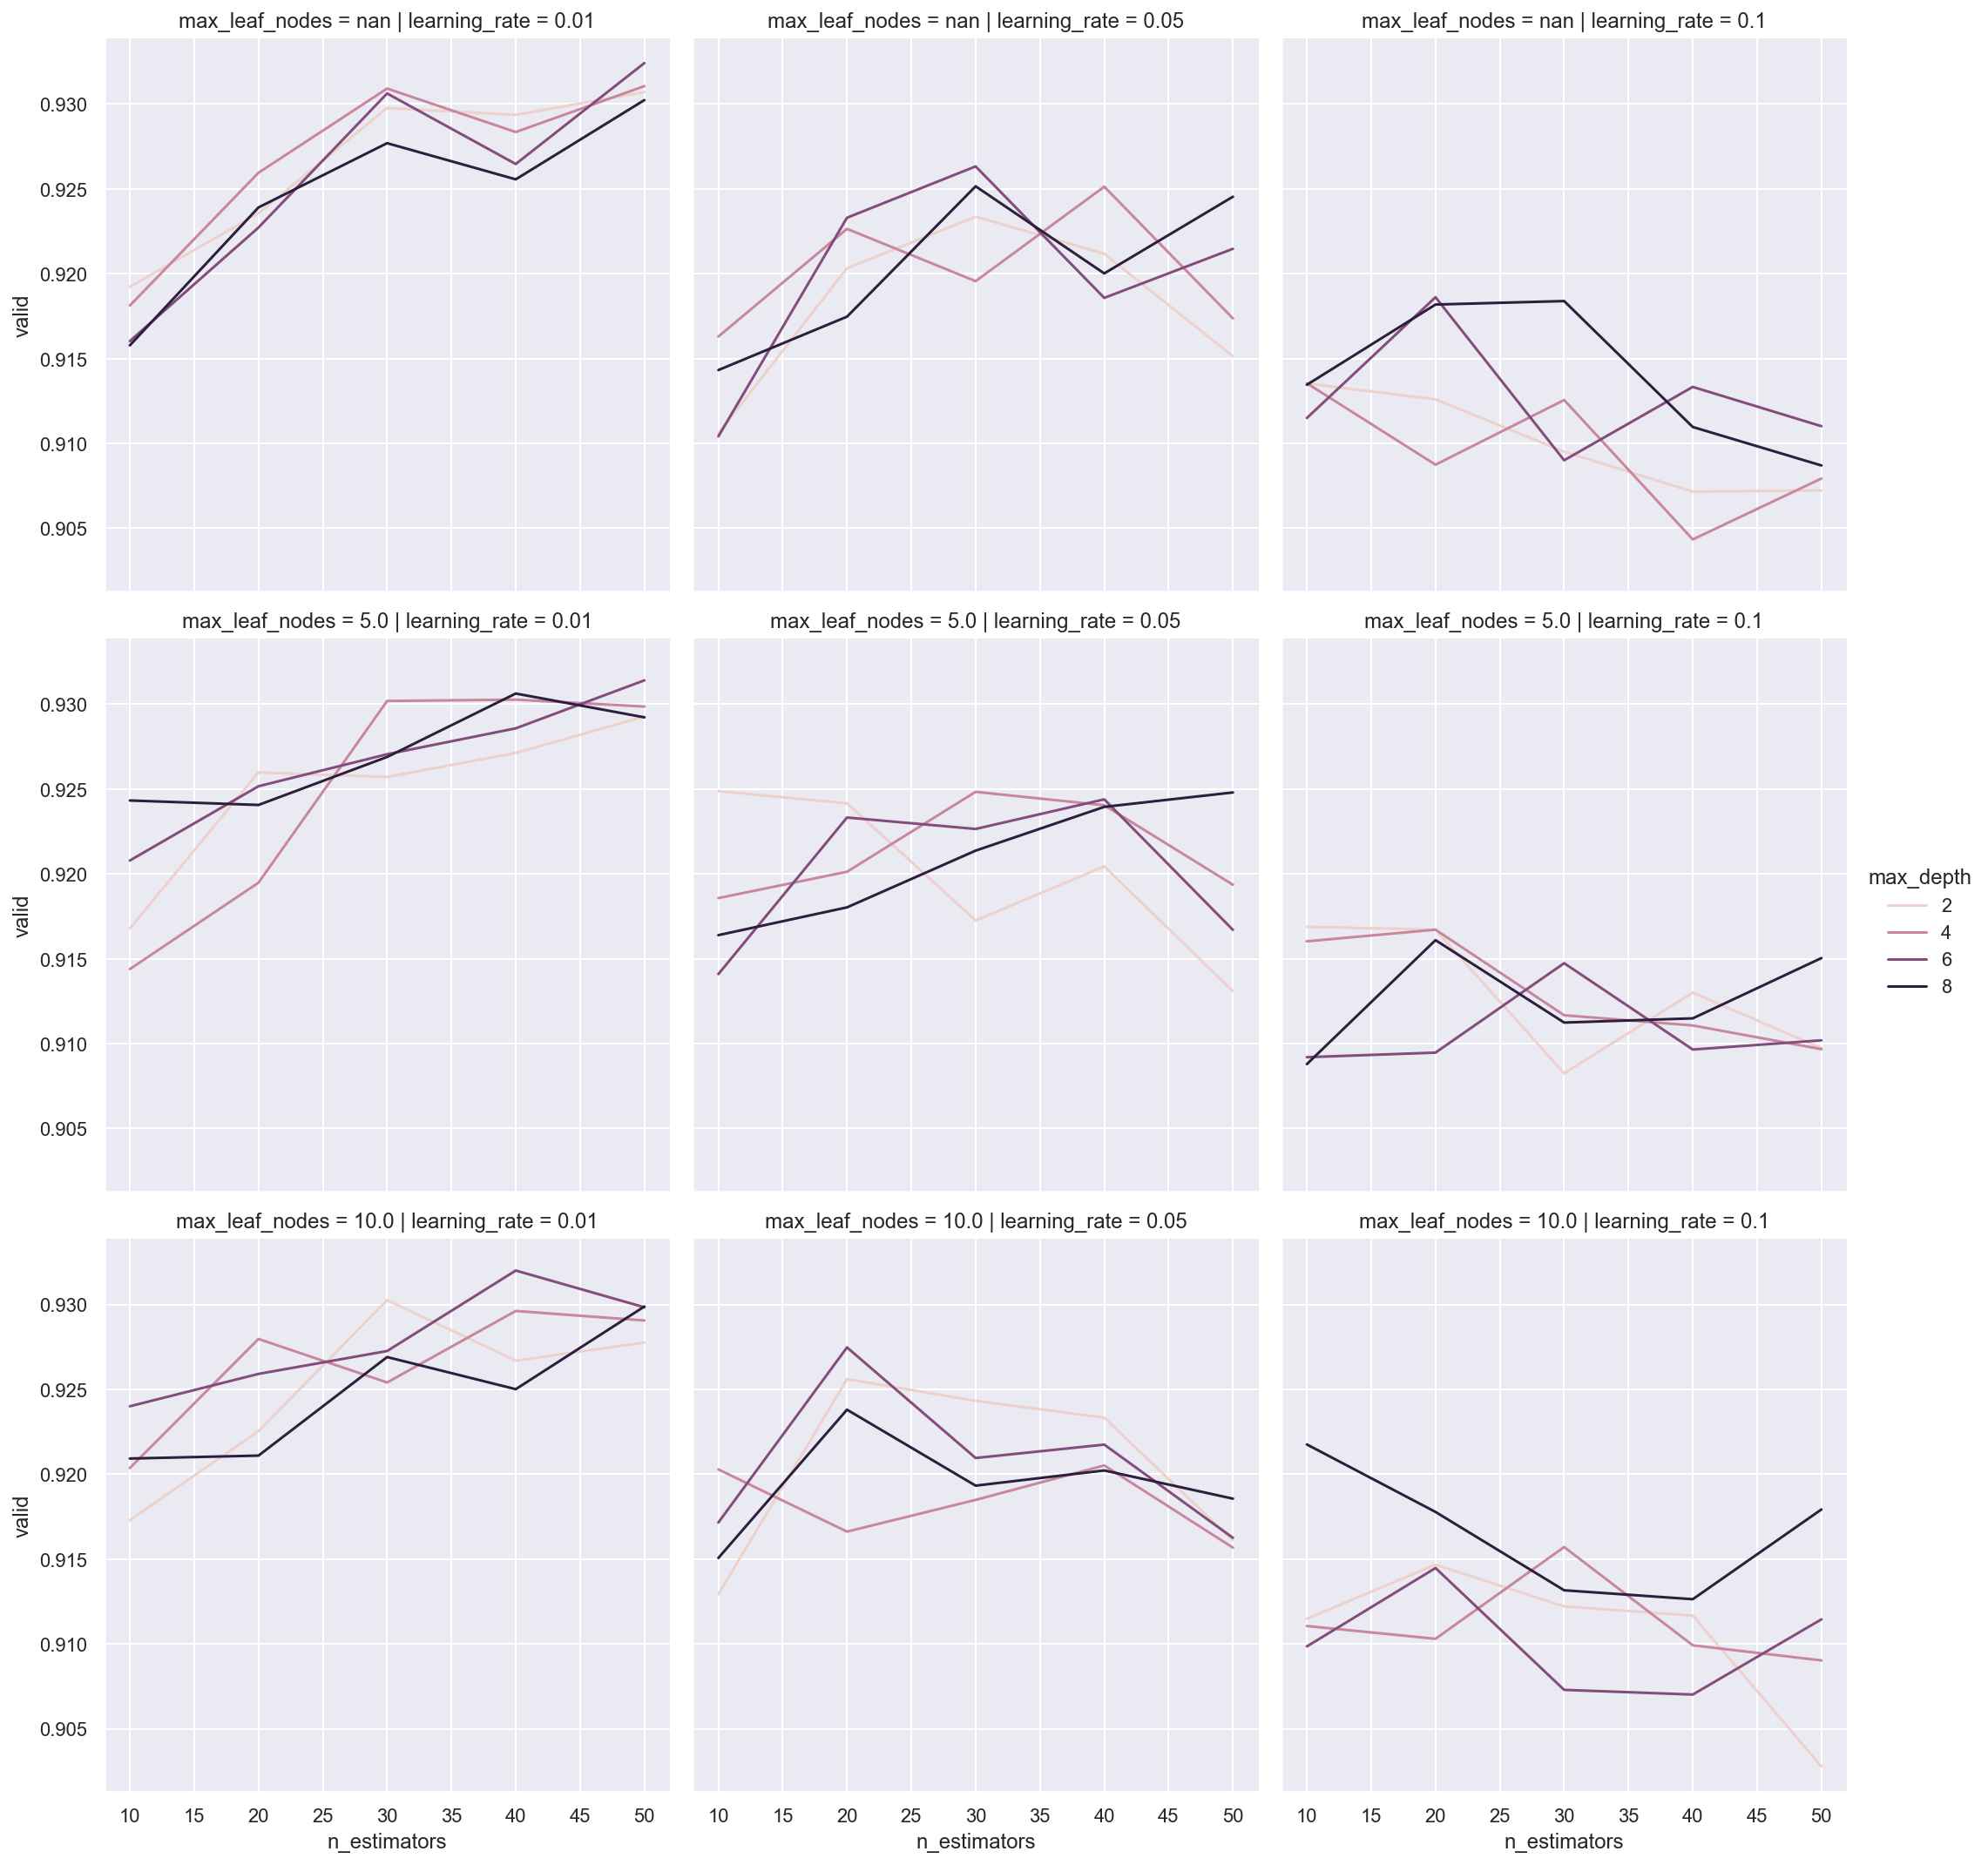

In [83]:
sns.relplot(data = result, x = 'n_estimators', y = 'valid',
            hue = 'max_depth', col = 'learning_rate',
            row = 'max_leaf_nodes', kind = 'line')

In [85]:
best = result.sort_values(by='valid', ascending=False).head(1)

,base_params,boost_params,train,valid,max_depth,max_leaf_nodes,n_estimators,learning_rate
104,"(6, None)","(50, 0.01)",0.994106,0.932415,6,nan,50,0.01


In [86]:
best_booster = Boosting(base_model_params = {'max_depth': 6, 
                                             'max_leaf_nodes': None},
         n_estimators=50, learning_rate = 0.01)
best_booster.fit(x_train, y_train, x_valid, y_valid)
train_score = best_booster.score(x_train, y_train)
valid_score = best_booster.score(x_valid, y_valid)
test_score = best_booster.score(x_test, y_test)

In [87]:
print(f'AUC-ROC Train {train_score}')
print(f'AUC-ROC Valid {valid_score}')
print(f'AUC-ROC Test {test_score}')

AUC-ROC Train 0.9941089064642151
AUC-ROC Valid 0.928309678943642
AUC-ROC Test 0.9318470595459463


## Задание 4. Пробуем разные библиотеки (2 балла)

Выберите себе библиотеку с реализацией градиентного бустинга по вкусу из следующих трёх - [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_intro.html), [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html), [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart). Подберите основные гиперпараметры, постарайтесь добиться наилучшего качества на тестовых данных. Сравните результаты своей реализации с результатами библиотечного бустинга.

In [88]:
from xgboost import XGBClassifier

param_dist = {"max_depth": [2, 4, 6, 8],
              "n_estimators": [10, 20, 30, 40, 50],
              "learning_rate": [0.1, 0.05, 0.01],
              "max_leaves": [0, 5, 10] # 0 is unlimited
              }

In [89]:
y_train2 = y_train.copy()
y_valid2 = y_valid.copy()
y_test2 = y_test.copy()

y_train2[y_train2 == -1] = 0
y_valid2[y_valid2 == -1] = 0
y_test2[y_test2 == -1] = 0

In [90]:
def score(clf, x, y):
    return roc_auc_score(y == 1, clf.predict_proba(x)[:, 1])

history = defaultdict(list)
combs = list(itertools.product(*param_dist.values()))
for comb in tqdm(combs):
    param_curr = dict(zip(param_dist.keys(), comb))
    xgb_clf = XGBClassifier(objective='binary:logistic',
                            booster='gbtree',
                            subsample=0.3, 
                            sampling_method = 'uniform',
                            tree_method = 'hist',
                            **param_curr)
    xgb_clf.fit(x_train, y_train2)
    history['train'].append(score(xgb_clf, x_train, y_train2))
    history['valid'].append(score(xgb_clf, x_valid, y_valid2))


100%|██████████| 180/180 [00:30<00:00,  5.84it/s]


In [91]:
result = pd.DataFrame(combs)
result.columns = list(param_dist.keys())
result.loc[result['max_leaves'] == 0, 'max_leaves'] = 'nan'
result['train'] = history['train']
result['valid'] = history['valid']
result.sort_values(by='valid', ascending=False).head(1)

,max_depth,n_estimators,learning_rate,max_leaves,train,valid
171,8,50,0.1,nan,0.97937,0.943745


In [92]:
xgb_clf_best = XGBClassifier(objective='binary:logistic',
                             booster='gbtree',
                             subsample=0.3,
                             max_depth=8,
                             n_estimators=50,
                             learning_rate=0.1,
                             max_leaves=0)
xgb_clf_best.fit(x_train, y_train2)
train_score = score(xgb_clf_best, x_train, y_train2)
valid_score = score(xgb_clf_best, x_valid, y_valid2)
test_score = score(xgb_clf_best, x_test, y_test2)

print(f'AUC-ROC Train {train_score}')
print(f'AUC-ROC Valid {valid_score}')
print(f'AUC-ROC Test {test_score}')

AUC-ROC Train 0.9793294405229185
AUC-ROC Valid 0.9443509230679588
AUC-ROC Test 0.9381792975533874


### Задание 5 (бонус). Пробуем ещё немножко библиотек (1 балл)

Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/). Сравните полученное качество с вашим ручным перебором. Используйте эту библиотеку чтобы подобрать параметры и для своей реалзиации и для библиотечной.

In [93]:
# YOUR CODE:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)


In [94]:
def xgb_objective(trial):
    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        # use exact for small dataset.
        # defines booster, gblinear for linear functions.
        "booster": "gbtree",
        "subsample": trial.suggest_float("subsample", 0.3, 1.0),
        # sampling according to each tree.
        "max_depth": trial.suggest_int("max_depth", 1, 30, step=2),
        # learning rate
        "eta": trial.suggest_float("eta", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 100, step=10),
        "max_leaves": trial.suggest_int("max_leaves", 0, 10, step=2) 
    }
    model = XGBClassifier(**param)
    model.fit(x_train, y_train2)
    aucroc = score(model, x_valid, y_valid2)
    return aucroc

In [95]:
study = optuna.create_study(direction="maximize")
study.optimize(xgb_objective, n_trials=100, 
               show_progress_bar=True)
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

100%|██████████| 100/100 [03:45<00:00,  2.26s/it]

Number of finished trials:  100
Best trial:
  Value: 0.9464034711729337
  Params: 
    subsample: 0.3376532620914905
    max_depth: 5
    eta: 0.17446291704451486
    n_estimators: 90
    max_leaves: 8


In [96]:
xgb_clf_optuna = XGBClassifier(**trial.params)
xgb_clf_optuna.fit(x_train, y_train2)
train_score = score(xgb_clf_optuna, x_train, y_train2)
valid_score = score(xgb_clf_optuna, x_valid, y_valid2)
test_score = score(xgb_clf_optuna, x_test, y_test2)

print(f'AUC-ROC Train {train_score}')
print(f'AUC-ROC Valid {valid_score}')
print(f'AUC-ROC Test {test_score}')

AUC-ROC Train 0.9794309378208865
AUC-ROC Valid 0.9464034711729337
AUC-ROC Test 0.940290305972229


In [97]:
def my_objective(trial):
    param = {
        "max_depth":trial.suggest_int("max_depth", 1, 30, step=2), 
        "max_leaf_nodes": trial.suggest_int("max_leaves", 0, 10, step=2),    
        "subsample": trial.suggest_float("subsample", 0.3, 1.0),
        "learning_rate": trial.suggest_float("eta", 1e-8, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 10, 100, step=10),
    }
    model = Boosting(base_model_params = {"max_depth": param["max_depth"],
                                          "max_leaf_nodes": param["max_leaf_nodes"]},
                     n_estimators = param["n_estimators"],
                     learning_rate = param["learning_rate"],
                     subsample = param["subsample"])
    model.fit(x_train, y_train, x_valid, y_valid)
    aucroc = model.score(x_valid, y_valid)
    return aucroc

In [98]:
study2 = optuna.create_study(direction="maximize")
study2.optimize(my_objective, n_trials=100,
               show_progress_bar=True)
print("Number of finished trials: ", len(study2.trials))
print("Best trial:")
trial2 = study2.best_trial

print("  Value: {}".format(trial2.value))
print("  Params: ")
for key, value in trial2.params.items():
    print("    {}: {}".format(key, value))

100%|██████████| 100/100 [05:05<00:00,  3.05s/it]

Number of finished trials:  100
Best trial:
  Value: 0.9341715935004906
  Params: 
    max_depth: 3
    max_leaves: 4
    subsample: 0.3276145154699227
    eta: 2.835809547091533e-08
    n_estimators: 30


In [190]:
booster_optuna = Boosting(base_model_params = {"max_depth": trial2.params["max_depth"],
                                               "max_leaf_nodes": trial2.params["max_leaves"]},
                          n_estimators = trial2.params["n_estimators"],
                          learning_rate = trial2.params["eta"],
                          subsample = trial2.params["subsample"])
booster_optuna.fit(x_train, y_train, x_valid, y_valid)
train_score = booster_optuna.score(x_train, y_train)
valid_score = booster_optuna.score(x_valid, y_valid)
test_score = booster_optuna.score(x_test, y_test)

print(f'AUC-ROC Train {train_score}')
print(f'AUC-ROC Valid {valid_score}')
print(f'AUC-ROC Test {test_score}')

AUC-ROC Train 0.9929024238805633
AUC-ROC Valid 0.9316824349294759
AUC-ROC Test 0.932479220560427


## Задание 6. Интерпретация бустинга (1 балл)

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

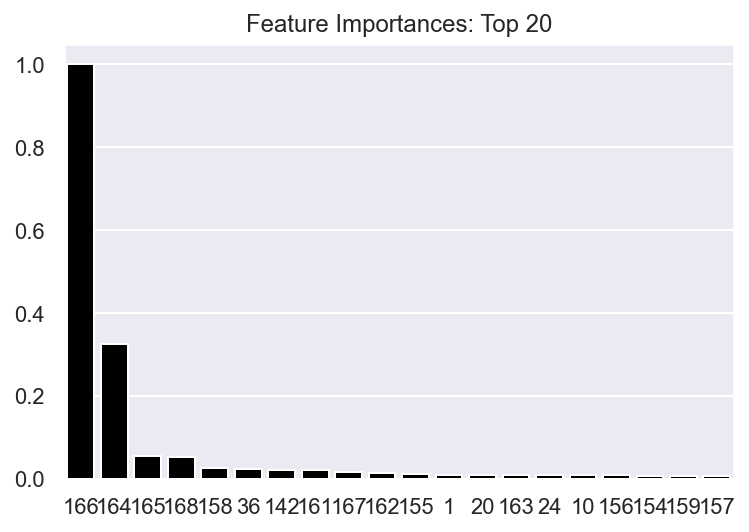

In [191]:
# YOUR CODE:
plot_feature_importances(booster_optuna, top=20)

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [192]:
# YOUR CODE:
def filter_features(model, cutoff):
    return np.argwhere(model.feature_importances_ >= cutoff).flatten()

short_features = filter_features(booster_optuna, 0.001)

class ShortBoosting:
    def __init__(self, Boosting, features):
        self.Boosting = Boosting
        self.features = features
    
    def fit(self, x_train, y_train, x_valid, y_valid):
        self.Boosting.fit(x_train[:, self.features],
                          y_train, 
                          x_valid[:, self.features],
                          y_valid)
        return self
    
    def predict_proba(self, x):
        return self.Boosting.predict_proba(x[:, self.features])
    
    def score(self, x, y):
        return self.Boosting.score(x[:, self.features], y)
        
    
boost = Boosting(base_model_params = {"max_depth": trial2.params["max_depth"],
                                      "max_leaf_nodes": trial2.params["max_leaves"]},
                n_estimators = trial2.params["n_estimators"],
                learning_rate = trial2.params["eta"],
                subsample = trial2.params["subsample"])
short_booster_optuna = ShortBoosting(Boosting = boost, 
                                     features = short_features)
short_booster_optuna.fit(x_train, y_train, x_valid, y_valid)

In [193]:
train_score = short_booster_optuna.score(x_train, y_train)
valid_score = short_booster_optuna.score(x_valid, y_valid)
test_score = short_booster_optuna.score(x_test, y_test)

print(f'AUC-ROC Train {train_score}')
print(f'AUC-ROC Valid {valid_score}')
print(f'AUC-ROC Test {test_score}')


AUC-ROC Train 0.9930403864933715
AUC-ROC Valid 0.9307573315836989
AUC-ROC Test 0.9305221193375142


## Задание 7 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашими лучшими моделями (ваша реализация с лучшими гиперпараметрами + все модели из библиотек с лучшими гиперпараметрами). Улучшилось ли качество?

In [204]:
# YOUR CODE:
xgb_clf_optuna = XGBClassifier(**trial.params)

booster_optuna = Boosting(base_model_params = {"max_depth": trial2.params["max_depth"],
                                               "max_leaf_nodes": trial2.params["max_leaves"]},
                          n_estimators = trial2.params["n_estimators"],
                          learning_rate = trial2.params["eta"],
                          subsample = trial2.params["subsample"])
best_booster = Boosting(base_model_params = {'max_depth': 6, 
                                             'max_leaf_nodes': None},
                        n_estimators=50, learning_rate = 0.01)

booster_for_short = Boosting(base_model_params={"max_depth": trial2.params["max_depth"],
                                             "max_leaf_nodes": trial2.params["max_leaves"]},
                          n_estimators=trial2.params["n_estimators"],
                          learning_rate=trial2.params["eta"],
                          subsample=trial2.params["subsample"])

short_booster_optuna = ShortBoosting(Boosting = booster_for_short, 
                                     features = short_features)

models = [xgb_clf_optuna, booster_optuna,
          best_booster, short_booster_optuna]


In [260]:
from sklearn.linear_model import LogisticRegression
import scipy.sparse

In [299]:
class Blending:
    def __init__(self, models, model_types, combiner):
        self.models = models
        self.model_types = model_types
        self.combiner = combiner
        self.weights = None
        
    def fit(self, x_train, y_train, x_valid, y_valid):
        # fit models
        self.fit_base_models(x_train, y_train, x_valid, y_valid)
        predictions = []
        x_stack = scipy.sparse.vstack([x_train, x_valid])
        y_stack = scipy.sparse.hstack([y_train, y_valid]).toarray().flatten()
        for model in self.models:
            predictions.append(model.predict_proba(x_stack)[:, 1])
        X_meta = np.vstack(predictions).T
        self.combiner.fit(X_meta, y_stack)
        pass
    
    def predict_proba(self, x):
        predictions = []
        for model in self.models:
            predictions.append(model.predict_proba(x)[:, 1])
        X_meta = np.vstack(predictions).T
        y_hat = self.combiner.predict_proba(X_meta)
        return y_hat
    
    def score(self, x, y):
        return roc_auc_score(y == 1, self.predict_proba(x)[:, 1])
    
    def fit_base_models(self, x_train, y_train, x_valid, y_valid):
        for model, type_ in zip(self.models, self.model_types):
            if type_ == 'mine':
                model.fit(x_train, y_train, x_valid, y_valid)
            if type_ == 'xgb':
                y_train2 = y_train.copy()
                y_train2[y_train2 == -1] = 0
                y_valid2 = y_valid.copy()
                y_valid2[y_valid2 == -1] = 0
                model.fit(x_train, y_train2)
        pass

In [300]:
blender = Blending(models=models,
                   model_types=['xgb', 'mine', 'mine', 'mine'],
                   combiner=LogisticRegression(penalty='none',
                                               max_iter = 5000,
                                               n_jobs=-1)
                   )

In [301]:
blender.fit(x_train, y_train, x_valid, y_valid)

In [306]:
blender.score(x_test, y_test)

0.940265901250624

In [307]:
blender.combiner.coef_

array([[3.90757037, 0.18069585, 2.73925715, 0.14606341]])